In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Lenovo\Anaconda3\envs\RagothEnv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
fashion_train_df = pd.read_csv(r'E:\Personal\NicheSoft\Fashion_MNIST\fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv(r'E:\Personal\NicheSoft\Fashion_MNIST\fashion-mnist_test.csv', sep = ',')
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

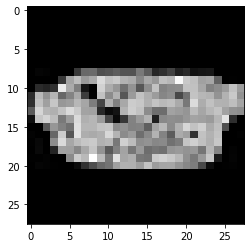

In [7]:
import random
i = random.randint(1,60000) 
plt.imshow( training[i,1:].reshape((28,28)) ) 
plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') 

In [8]:
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

C:\Users\Lenovo\Anaconda3\envs\RagothEnv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [11]:
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [16]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
classifier = Sequential()
classifier.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))

C:\Users\Lenovo\Anaconda3\envs\RagothEnv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  after removing the cwd from sys.path.


In [19]:
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

In [20]:
classifier.add(Conv2D(32,3, 3, activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

C:\Users\Lenovo\Anaconda3\envs\RagothEnv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [21]:
from keras.layers import Flatten, Dense
classifier.add(Flatten())
classifier.add(Dense(output_dim = 32, activation = 'relu'))
classifier.add(Dense(output_dim = 10, activation = 'sigmoid'))

C:\Users\Lenovo\Anaconda3\envs\RagothEnv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lenovo\Anaconda3\envs\RagothEnv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  after removing the cwd from sys.path.


In [29]:
from keras import optimizers
classifier.compile(loss ='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics =['accuracy'])

In [30]:
epochs = 50
history = classifier.fit(X_train, y_train, batch_size = 512, nb_epoch = epochs, verbose = 1, validation_data = (X_validate, y_validate))

C:\Users\Lenovo\Anaconda3\envs\RagothEnv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 41s 848us/step - loss: 1.1654 - accuracy: 0.5597 - val_loss: 0.6965 - val_accuracy: 0.7398
Epoch 2/50
48000/48000 [==============================] - 37s 780us/step - loss: 0.6273 - accuracy: 0.7650 - val_loss: 0.5814 - val_accuracy: 0.7759
Epoch 3/50
48000/48000 [==============================] - 38s 802us/step - loss: 0.5404 - accuracy: 0.7984 - val_loss: 0.4896 - val_accuracy: 0.8242
Epoch 4/50
48000/48000 [==============================] - 38s 785us/step - loss: 0.4883 - accuracy: 0.8210 - val_loss: 0.4623 - val_accuracy: 0.8408
Epoch 5/50
48000/48000 [==============================] - 38s 785us/step - loss: 0.4485 - accuracy: 0.8402 - val_loss: 0.4201 - val_accuracy: 0.8539
Epoch 6/50
48000/48000 [==============================] - 39s 805us/step - loss: 0.4198 - accuracy: 0.8506 - val_loss: 0.4038 - val_accuracy: 0.8549
Epoch 7/50
48000/48000 [==============================] 

In [31]:
evaluation = classifier.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 225us/step


In [33]:
print("test loss, test acc:", evaluation)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = classifier.predict(X_test[:3])
print("predictions shape:", predictions.shape)

test loss, test acc: [0.270729844725132, 0.9057999849319458]
Generate predictions for 3 samples
predictions shape: (3, 10)
